In [1]:
#STEETING UP THE CONNECTION BETWEEN THE DATA SET to the notebook

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yash12092001w","key":"16bb3e94cab4a8888d2b2e2e204feed3"}'}

In [4]:
 ! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle competitions download -c digit-recognizer

 59% 9.00M/15.3M [00:00<00:00, 86.6MB/s]
100% 15.3M/15.3M [00:00<00:00, 121MB/s] 


In [ ]:
# Create a directory for the data

In [12]:
! mkdir train

In [13]:
! unzip digit-recognizer.zip -d train

Archive:  digit-recognizer.zip
  inflating: train/sample_submission.csv  
  inflating: train/test.csv          
  inflating: train/train.csv         


In [ ]:
#Import Numpy and pandas with data set

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train/train.csv')

In [16]:
#viewing the data set
data.head (10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data = np.array(data) #convert the data into array
m, n = data.shape # knowing the dimesion where m= row and n is col
np.random.shuffle(data) # shuffle before splitting into dev and training sets

In [19]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [20]:
#transpose the data to get each col as an exapmele  rather an row
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [21]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.


In [22]:
Y_train


array([6, 8, 9, ..., 5, 8, 7])

In [23]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
X_train[:,0].shape

(784,)

In [26]:
def init_params():
  w1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  w2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return w1, b1, w2, b2

def ReLU(Z):
  return np.maximum(Z, 0)
def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(w1, b1, w2, b2, X):
  z1 = w1.dot(X) + b1
  a1 = ReLU(z1)
  z2 = w2.dot(a1) + b2
  a2 = softmax(z2)
  return z1, a1, z2, a2

def ReLU_deriv(Z):
  return Z > 0

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def backward_prop(z1, a1, z2, a2, w1, w2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = a2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(a1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = w2.T.dot(dZ2) * ReLU_deriv(z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2

def update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, alpha):
  w1 = w1 - alpha * dW1
  b1 = b1 - alpha * db1
  w2 = w2 - alpha * dW2
  b2 = b2 - alpha * db2
  return w1, b1, w2, b2



In [52]:
def get_prediction (a2):
  return np.argmax(a2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

# loop of Fp to Bp To UP
def gradient_descent(X, Y, iterations, alpha):
  w1, b1, w2, b2 = init_params()
  for i in range(iterations):
    z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
    dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w1, w2, X, Y)
    w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)

   # printing every 10th iterations
    if i % 10 == 0:
      print("Iteration: ", i)
      print("Acc: ",get_accuracy(get_prediction(a2) ,Y))
    return w1, b1, w2, b2

In [65]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 500 ,0.5)

Iteration:  0
[6 6 6 ... 6 6 1] [6 8 9 ... 5 8 7]
Acc:  0.1288048780487805


In [70]:
# training the model
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_prediction(A2)
    return predictions


# making the predecttion and printing out the priedtion
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  6


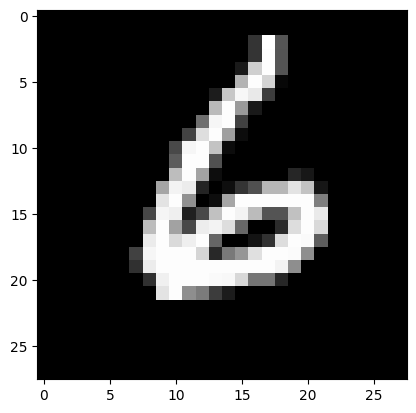

In [71]:
test_prediction(0, w1, b1, w2, b2)